<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/ProyectoPart2IvanRodriguezGoyenaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga del DATASET e informacion general

In [88]:
import pandas as pd
import numpy as np

# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Vista general del dataset
print("Primeras filas del dataset:")
print(df.head())

# Dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Información general
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas de variables numéricas
print("\nResumen estadístico:")
print(df.describe())

# Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

Primeras filas del dataset:
   Order ID   Restaurant Name     Location        Order Time  \
0    770487      El Taco Loco     New York  01-08-2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0  01-08-2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  
0               5           3.01       9.25     2.22          False  
1             

# Análisis Exploratorio y Reprocesamiento



Se realizó una limpieza inicial y un análisis exploratorio completo del dataset, identificando las variables relevantes y comprendiendo su distribución y tipo. Se convirtieron las fechas a formatos útiles (fecha, mes, hora, día de la semana) para enriquecer la información temporal, y se prepararon variables categóricas para su posterior codificación. Esta etapa fue fundamental para asegurar la calidad de los datos y sentar las bases para el modelado.




### Transformaciones Realizadas

In [89]:
# Cambio de formato Fecha y Extraccion Dia , Mes, Año, Hora , Dia de semana , Fin de semana.


df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')
df["Fecha"] = df["Order Time"].dt.date
df["Hora"] = df["Order Time"].dt.hour
df["Mes"] = df["Order Time"].dt.month
df['Nombre_Mes'] = df['Order Time'].dt.strftime('%B')
df['Año'] = df['Order Time'].dt.year
df["Día de Semana"] = df["Order Time"].dt.day_name()
df['Es_Finde'] = df['Día de Semana'].isin(['Saturday', 'Sunday'])


# Clasificacion momento del Dia
def asignar_momento(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Momento_del_día'] = df['Hora'].apply(asignar_momento)



# Mostrar los nombres de las columnas
print(df.columns)

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type',
       'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)',
       'Weekend Order', 'Fecha', 'Hora', 'Mes', 'Nombre_Mes', 'Año',
       'Día de Semana', 'Es_Finde', 'Momento_del_día'],
      dtype='object')


### Multigraficos Exploratorios

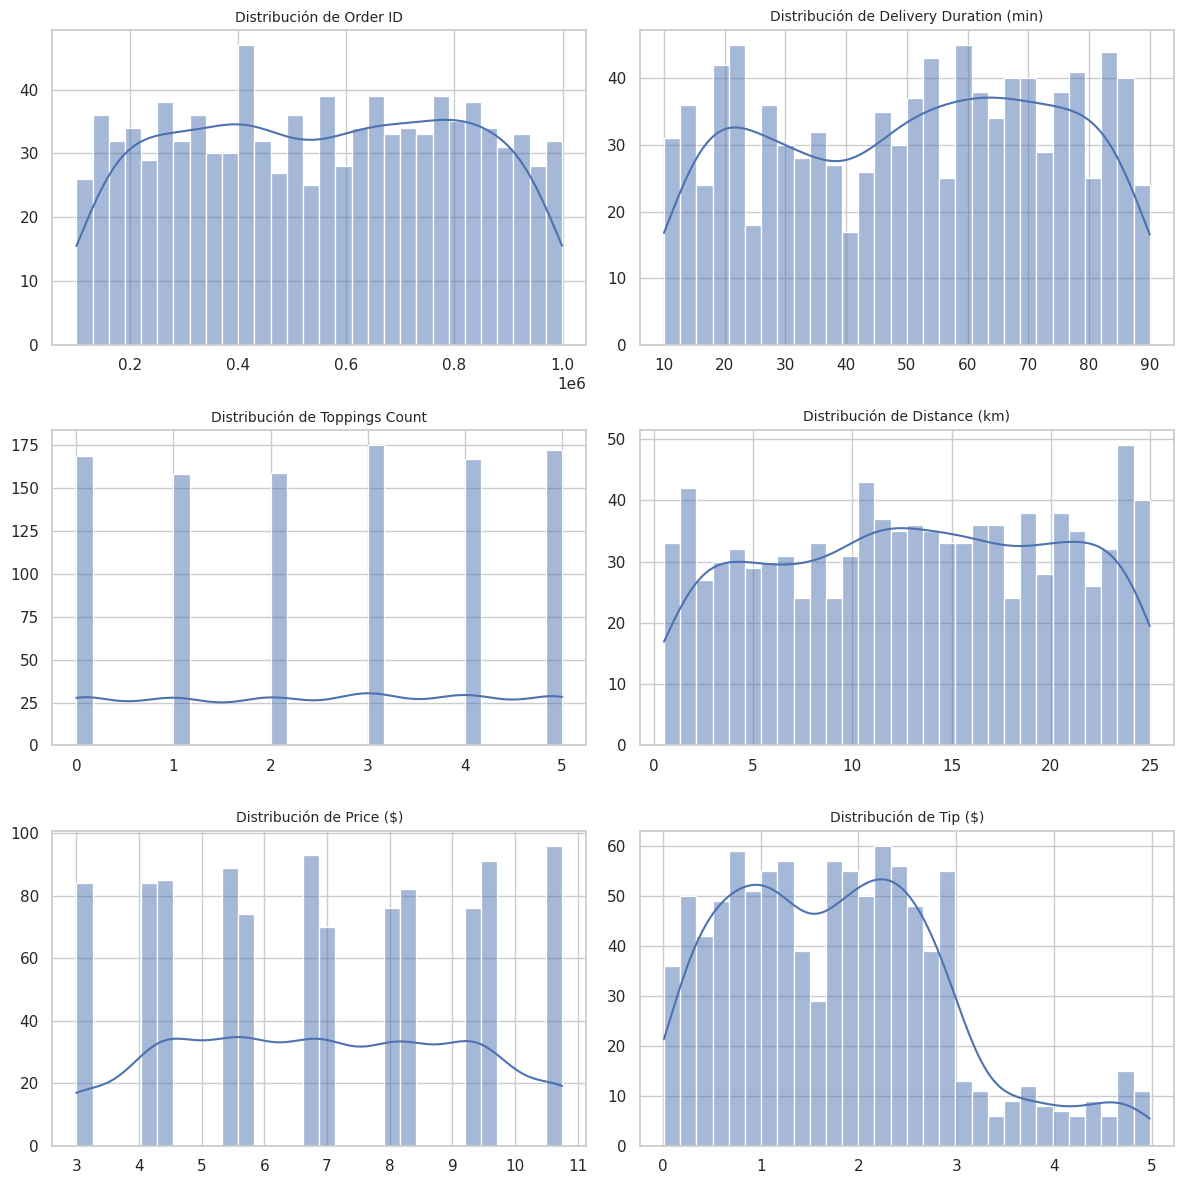

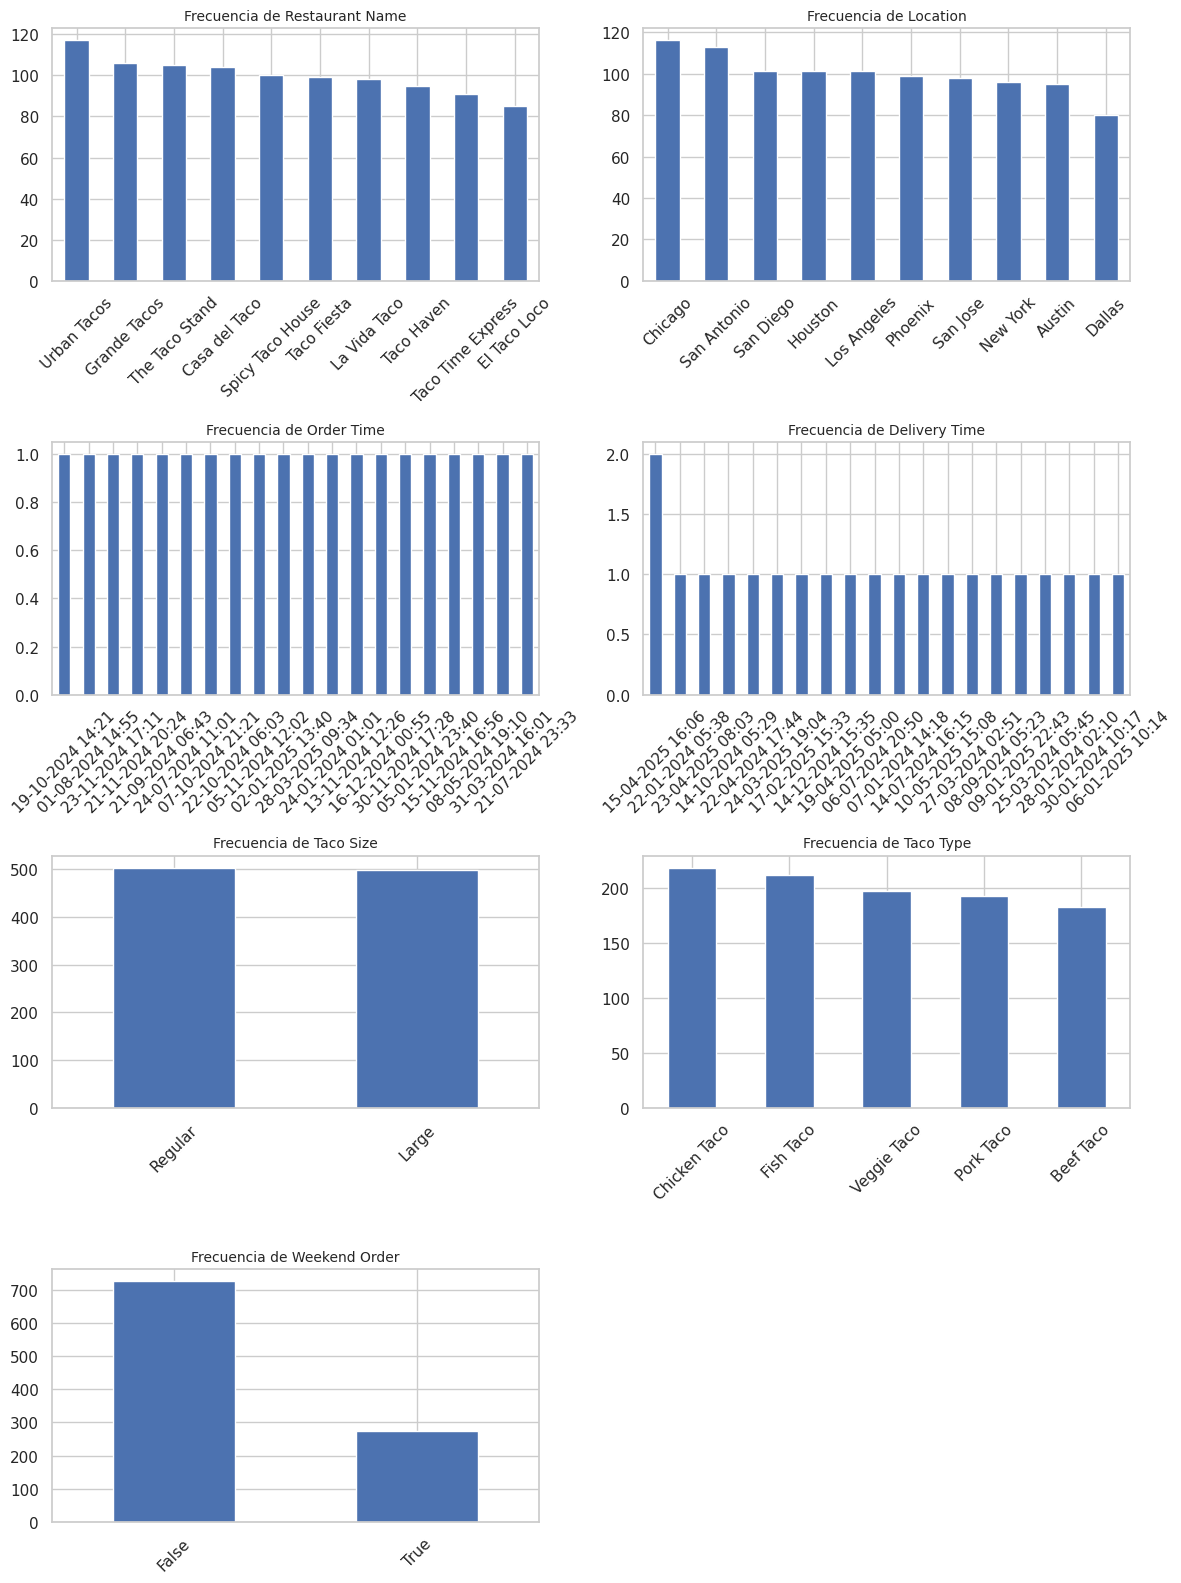

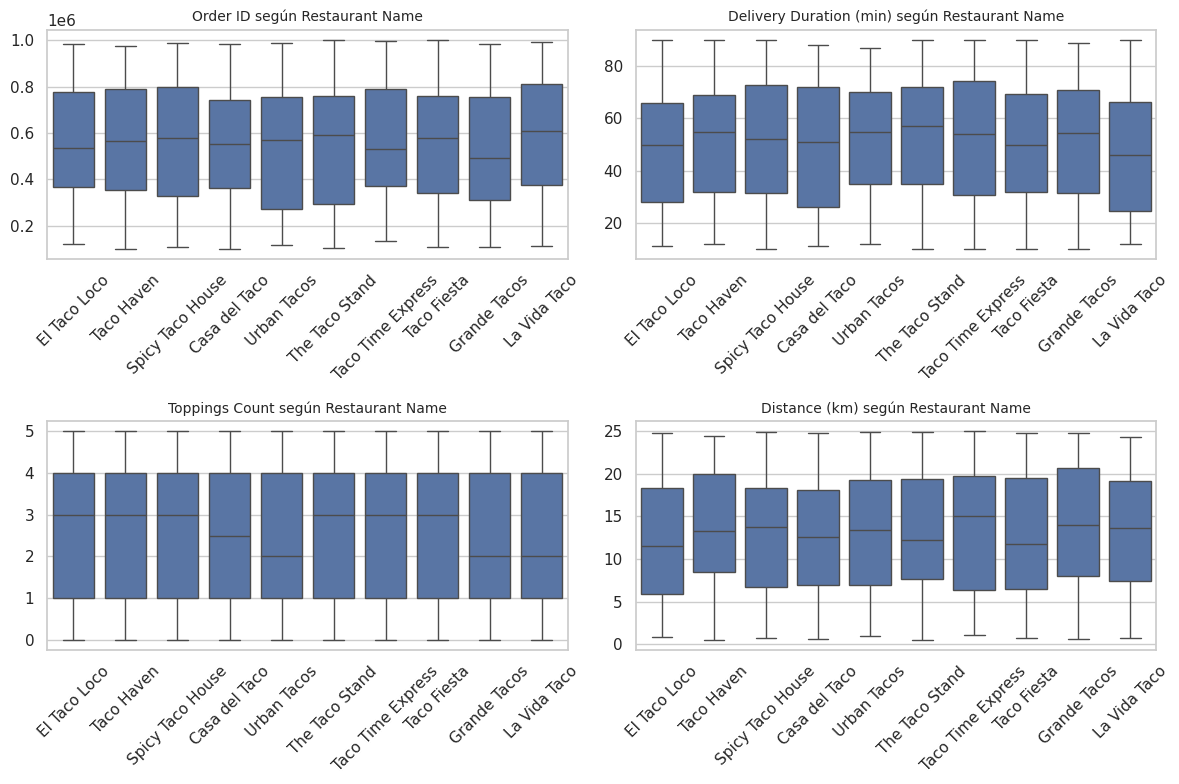

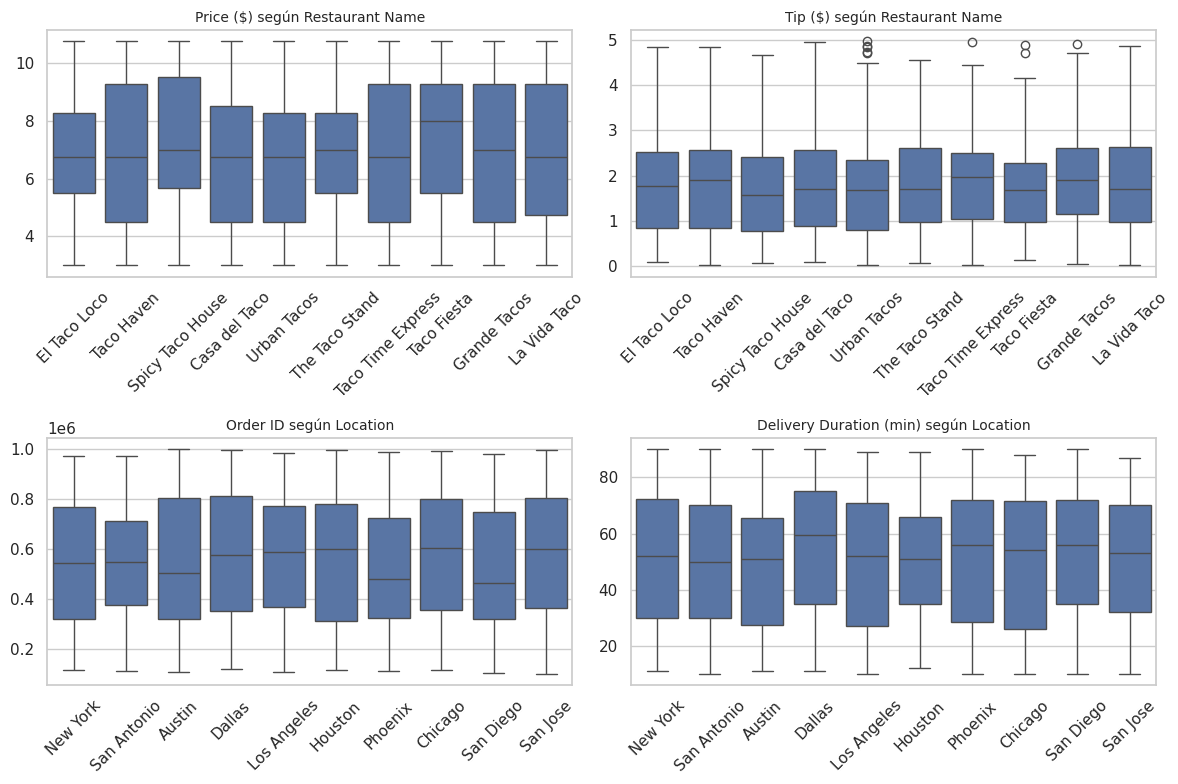

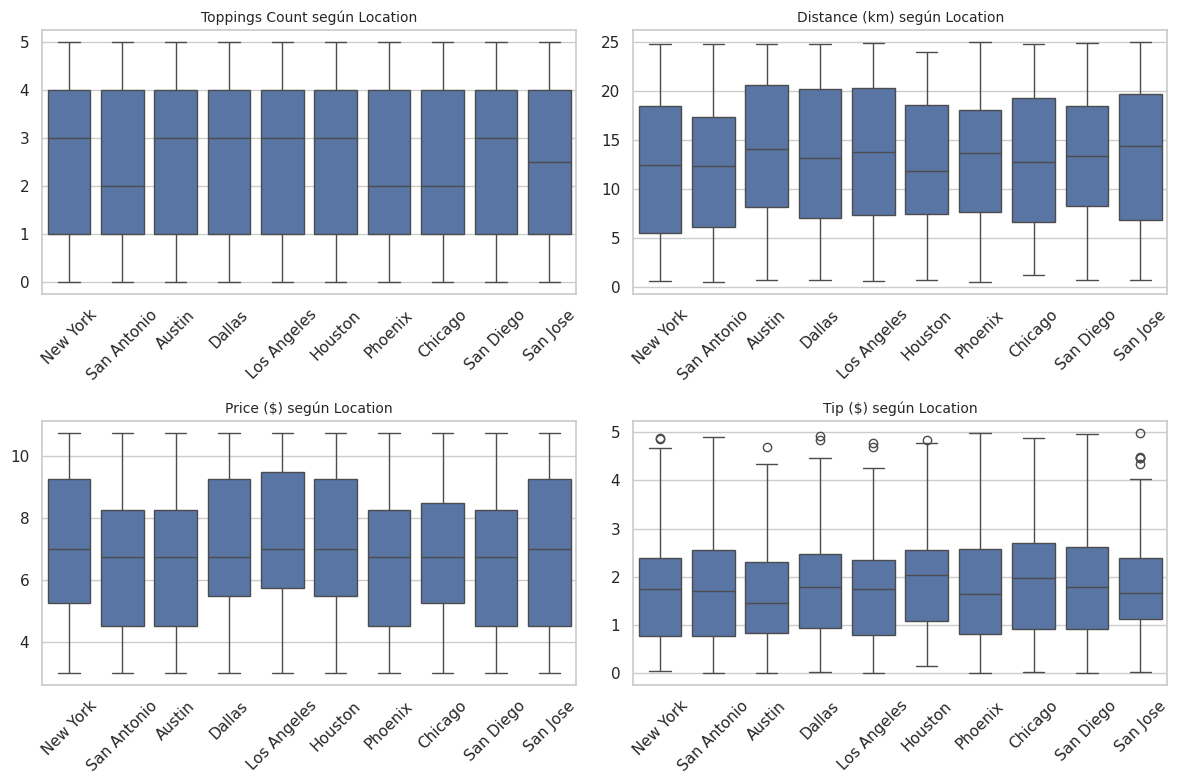

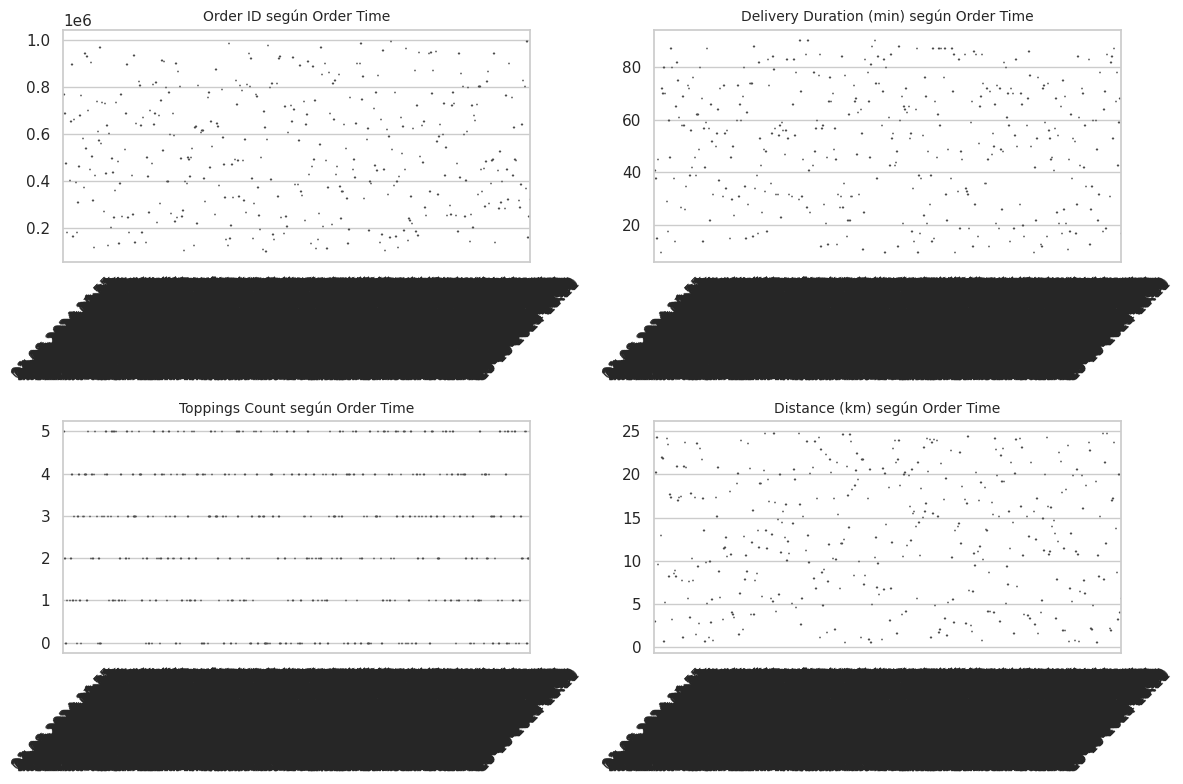

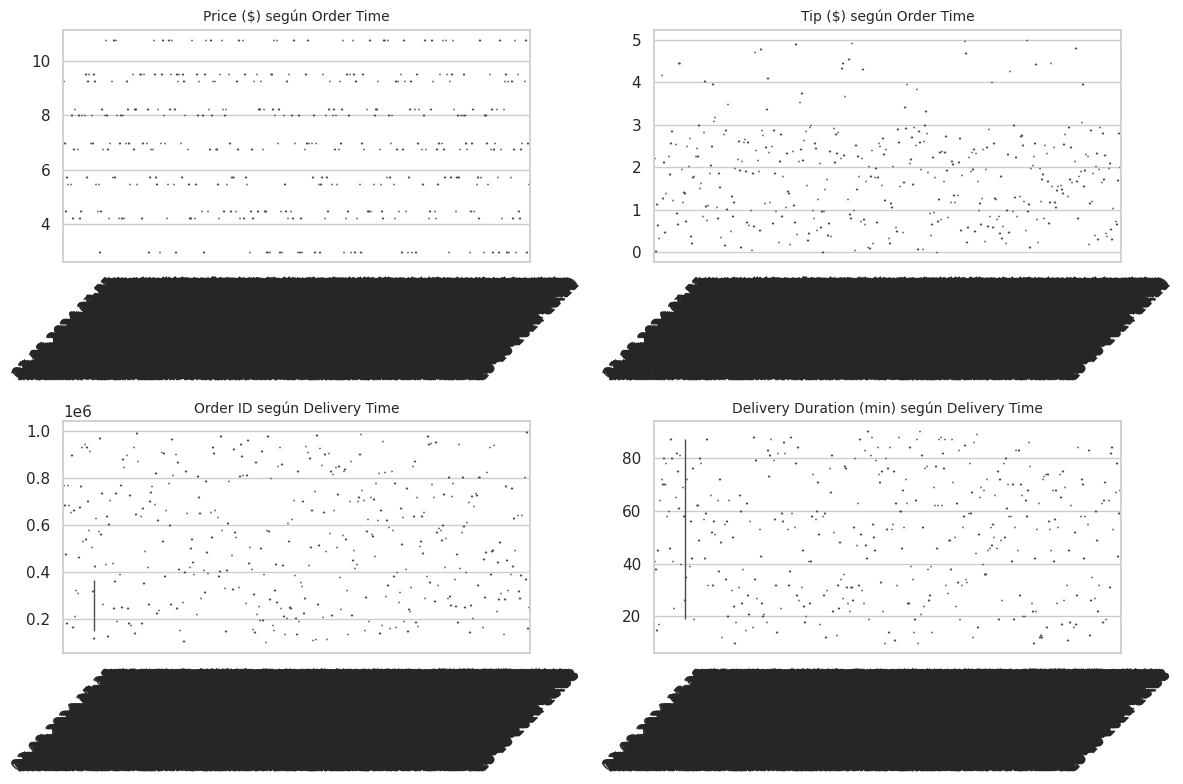

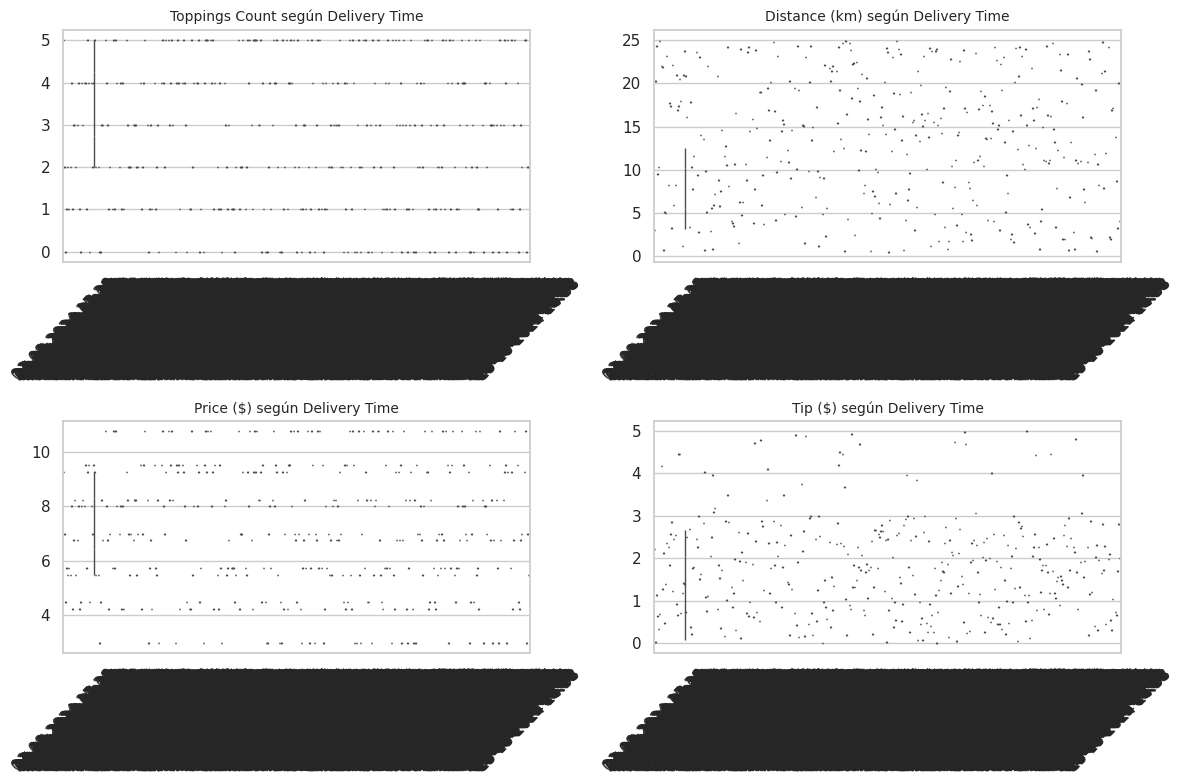

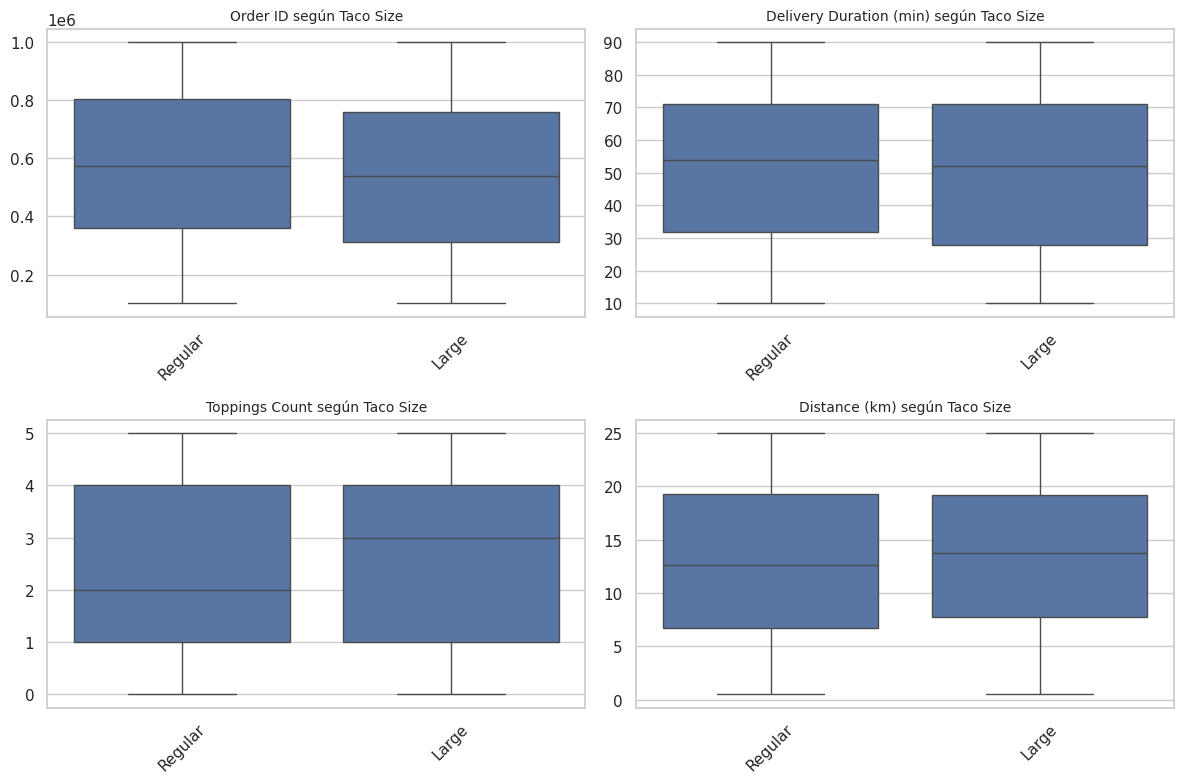

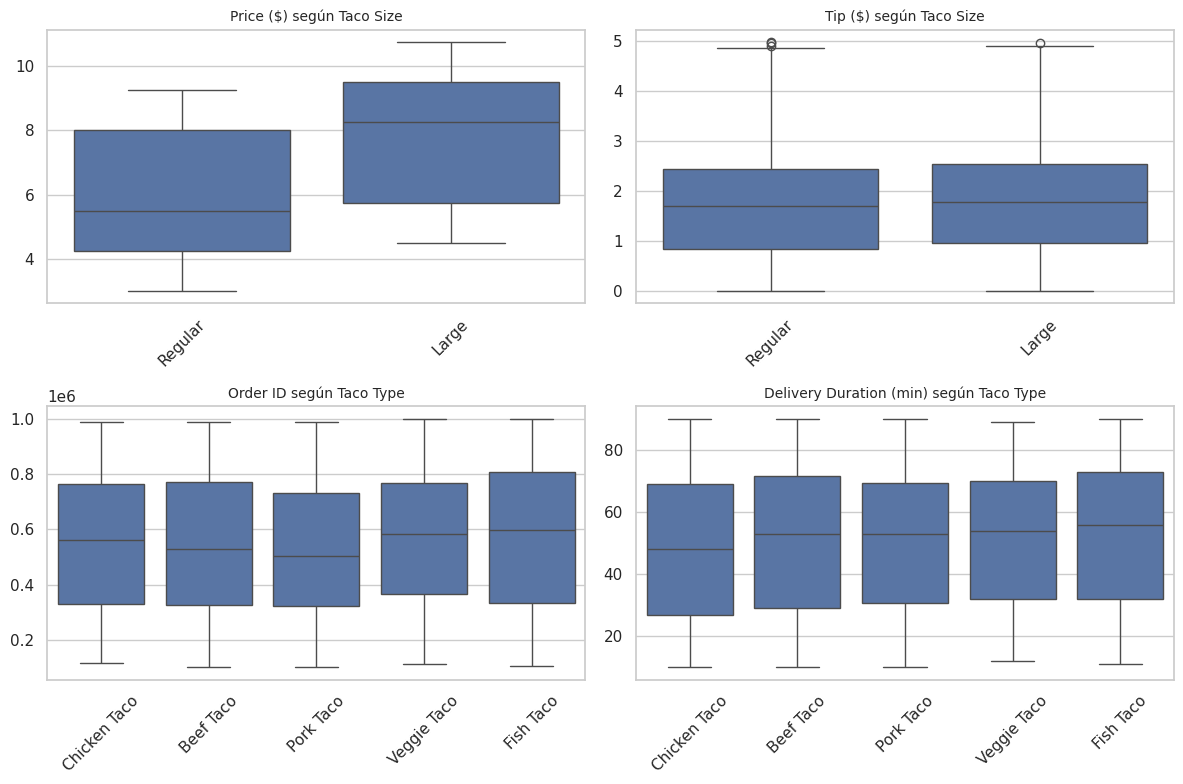

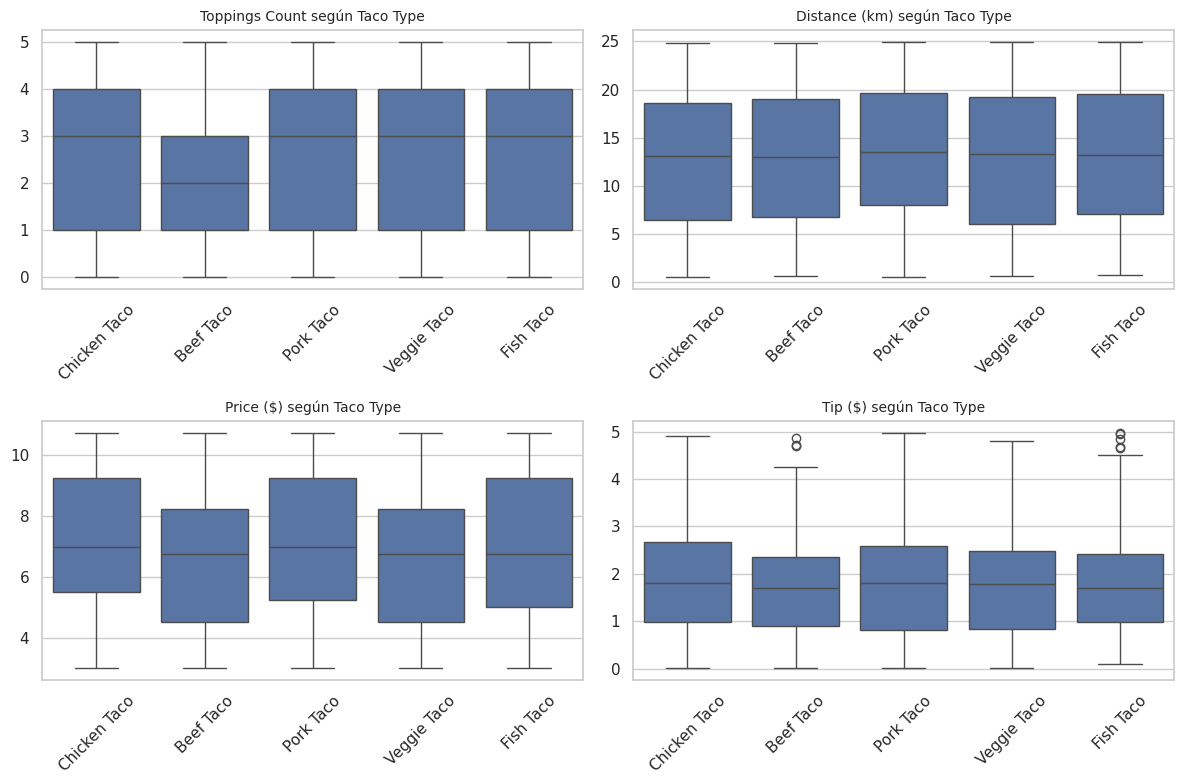

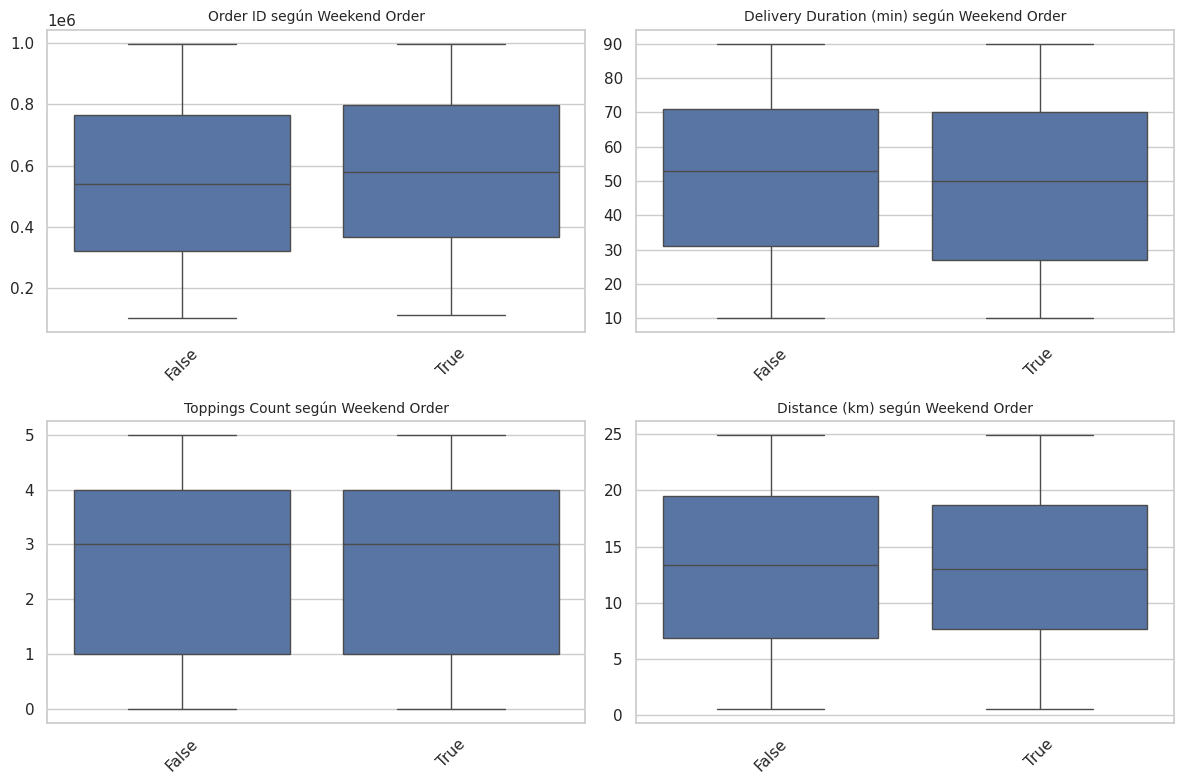

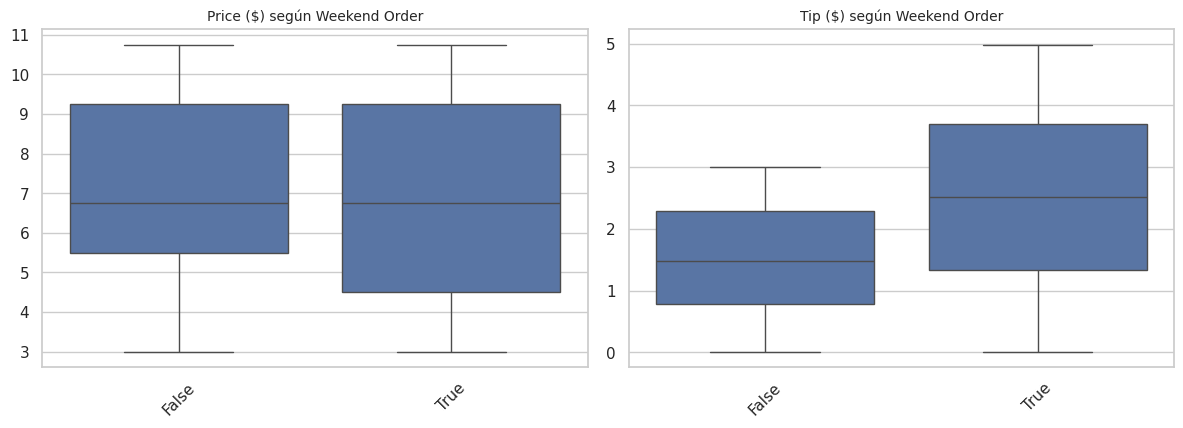

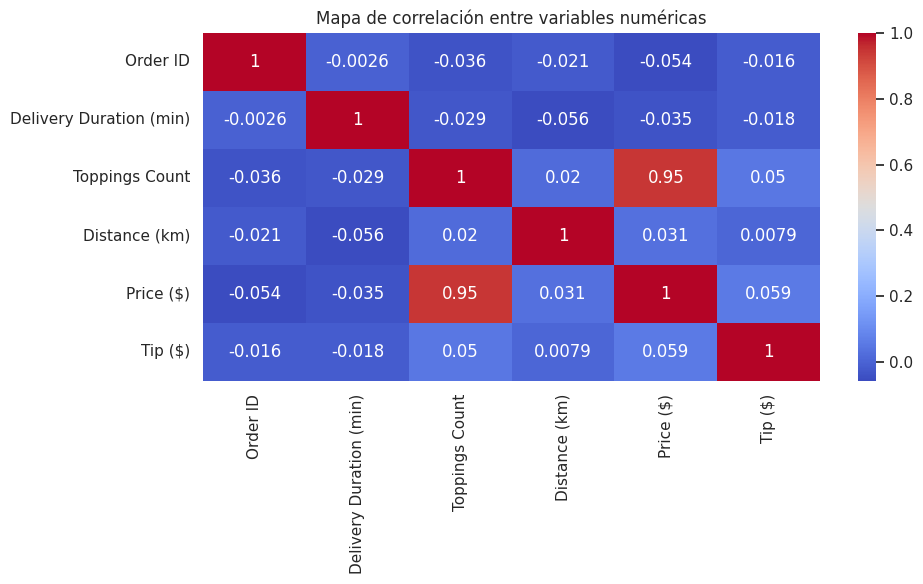

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Cargar dataset
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

# Separar variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 1. HISTOGRAMAS NUMÉRICOS EN GRILLA
def plot_histograms(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[j])
            axes[j].set_title(f'Distribución de {col}', fontsize=10)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 2. BARRAS CATEGÓRICAS EN GRILLA
def plot_bars(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            df[col].value_counts().head(20).plot(kind='bar', ax=axes[j])
            axes[j].set_title(f'Frecuencia de {col}', fontsize=10)
            axes[j].tick_params(axis='x', rotation=45)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 3. BOXPLOTS NUMÉRICO VS CATEGÓRICO EN GRILLA
def plot_boxplots(categorical_cols, numeric_cols):
    pairs = [(cat, num) for cat in categorical_cols for num in numeric_cols]
    cols = 2
    rows = 2  # para no hacer demasiados a la vez
    per_page = cols * rows
    for i in range(0, len(pairs), per_page):
        subset = pairs[i:i + per_page]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, (cat, num) in enumerate(subset):
            try:
                sns.boxplot(x=df[cat], y=df[num], ax=axes[j])
                axes[j].set_title(f'{num} según {cat}', fontsize=10)
                axes[j].tick_params(axis='x', rotation=45)
                axes[j].set_xlabel('')
                axes[j].set_ylabel('')
            except Exception as e:
                axes[j].set_visible(False)

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 4. HEATMAP DE CORRELACIÓN
def plot_corr_heatmap():
    if len(numeric_cols) >= 2:
        plt.figure(figsize=(10, 6))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Mapa de correlación entre variables numéricas', fontsize=12)
        plt.tight_layout()
        plt.show()

# 📊 Ejecutar todo
plot_histograms(numeric_cols)
plot_bars(categorical_cols)
plot_boxplots(categorical_cols, numeric_cols)
plot_corr_heatmap()


# Regresion

### Comparación de Modelos de Regresión

Se evaluaron diferentes modelos de regresión lineal para medir su desempeño.
El modelo Ridge mostro la mejor capacidad predictiva, con un R2 promedio cercano al 0.89 y bajo error medio cuadrático.
Podemos entender que el modelo explica bien la variabilidad del precio usando las variables seleccionadas y es robusto frente a la variabilidad del conjunto de datos.



In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Create a copy of the dataframe
df_reg = df.copy()


df_reg['Order Time'] = pd.to_datetime(df_reg['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')
df_reg["Hora"] = df_reg["Order Time"].dt.hour
df_reg["Mes"] = df_reg["Order Time"].dt.month


# Clasificacion momento del Dia
def asignar_momento(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df_reg['Momento_del_día'] = df_reg['Hora'].apply(asignar_momento)


# 1. One-hot encoding de categóricas
df_reg = pd.get_dummies(df_reg, columns=['Location', 'Momento_del_día'], drop_first=True)

# 2. Definir features y target
features = [
    'Toppings Count', 'Distance (km)', 'Tip ($)', 'Delivery Duration (min)', 'Hora', 'Mes'
] + [col for col in df_reg.columns if col.startswith('Location_') or col.startswith('Momento_del_día_')]

X = df_reg[features]
y = df_reg['Price ($)']




# 3. División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Entrenar modelos
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': name, 'MSE': mse, 'R²': r2})

# 5. Mostrar resultados
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

       Modelo       MSE        R²
1       Ridge  0.558040  0.889873
0      Linear  0.558048  0.889871
3  ElasticNet  0.852145  0.831832
2       Lasso  0.867871  0.828729


### Grafico Comparativo de los Modelos de Regresion Lineal

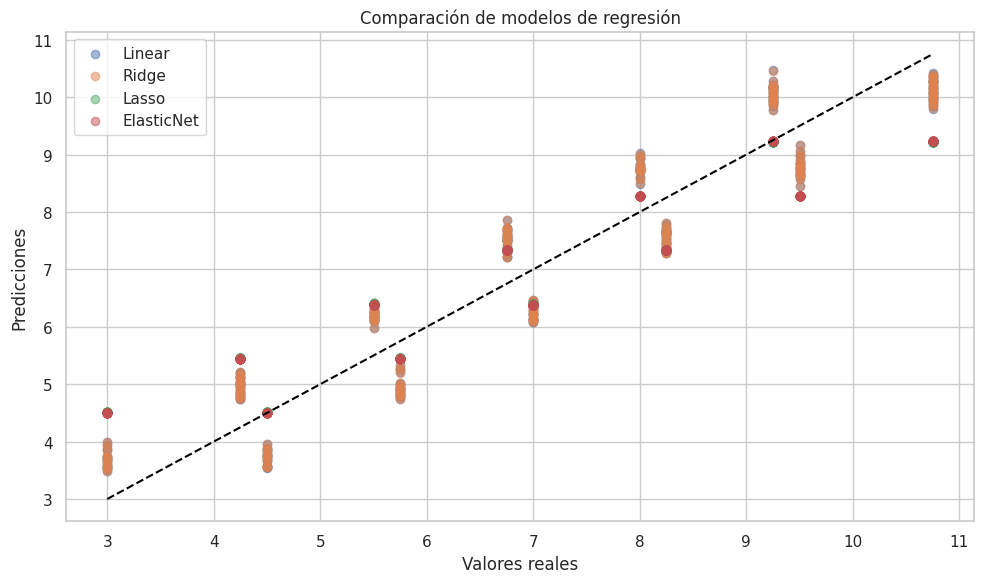

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for nombre, modelo in models.items():
    y_pred = modelo.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=nombre)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de modelos de regresión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafico de Prediccion VS Real y Grafico de Residuos

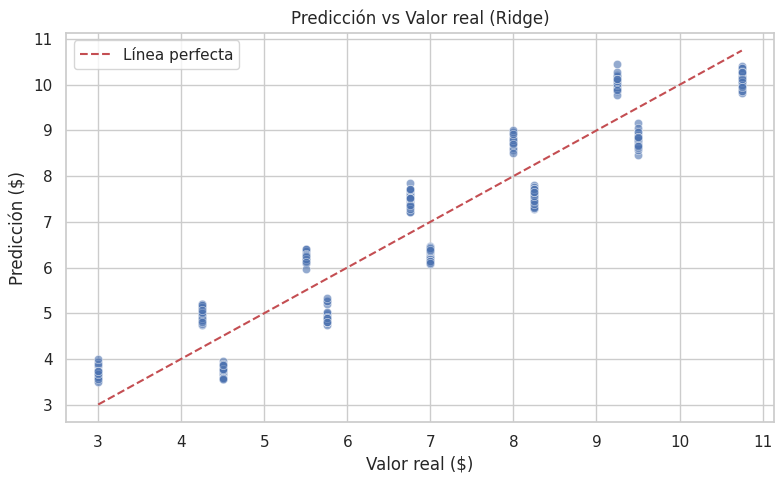

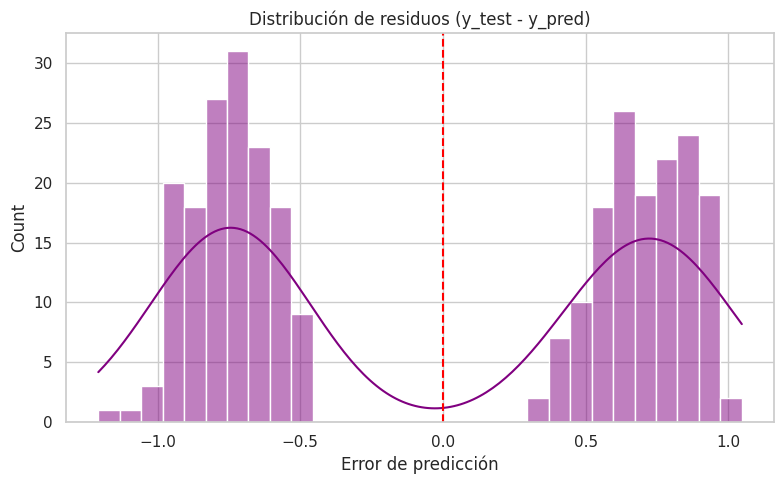

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Entrenar Ridge con los datos finales
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
residuals = y_test - y_pred

# 2. Predicción vs Real
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea perfecta')
plt.xlabel('Valor real ($)')
plt.ylabel('Predicción ($)')
plt.title('Predicción vs Valor real (Ridge)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de residuos (y_test - y_pred)')
plt.xlabel('Error de predicción')
plt.tight_layout()
plt.show()


In [94]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# 1. Definir el modelo
ridge = Ridge()

# 2. Validación cruzada k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Métrica: R²
r2_scores = cross_val_score(ridge, X, y, cv=kf, scoring='r2')
print("R² por fold:", r2_scores)
print("Promedio R²:", r2_scores.mean())

# 4. Métrica: MSE (se devuelve negativo, hay que multiplicar por -1)
mse_scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # lo hacemos positivo
print("\nMSE por fold:", mse_scores)
print("Promedio MSE:", mse_scores.mean())


R² por fold: [0.88531591 0.90252092 0.90574147 0.88176693 0.88350846]
Promedio R²: 0.891770738869808

MSE por fold: [0.56467562 0.55731471 0.55881819 0.59836553 0.56586474]
Promedio MSE: 0.5690077569355745


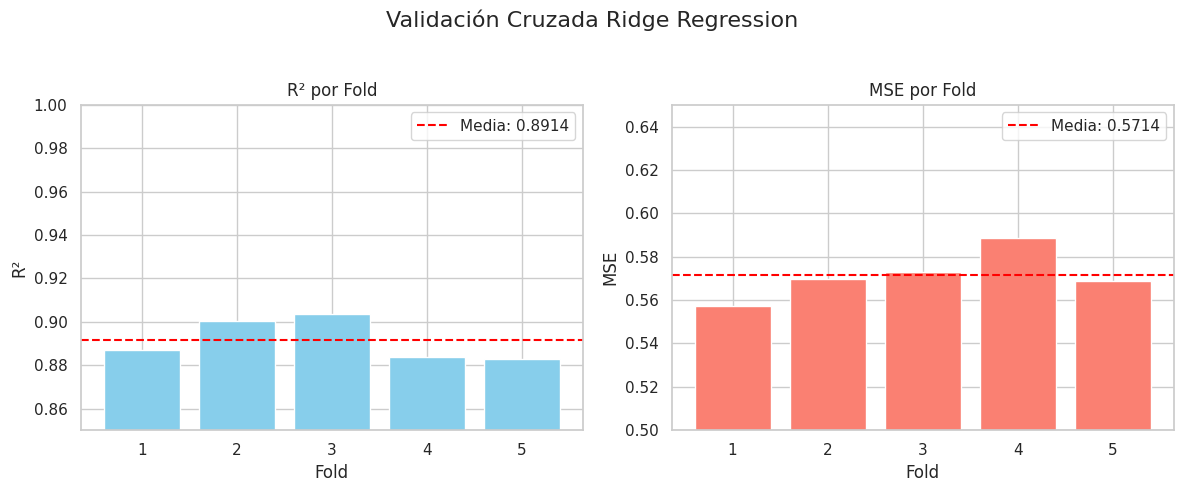

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados (ejemplo con tus datos)
r2_scores = np.array([0.8867899, 0.90036919, 0.90338411, 0.8836605, 0.88293954])
mse_scores = np.array([0.55741803, 0.56961671, 0.57279397, 0.5887824, 0.56862832])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico R²
axs[0].bar(range(1, 6), r2_scores, color='skyblue')
axs[0].set_title('R² por Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('R²')
axs[0].set_ylim([0.85, 1])
axs[0].axhline(r2_scores.mean(), color='red', linestyle='--', label=f'Media: {r2_scores.mean():.4f}')
axs[0].legend()

# Gráfico MSE
axs[1].bar(range(1, 6), mse_scores, color='salmon')
axs[1].set_title('MSE por Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0.5, 0.65])
axs[1].axhline(mse_scores.mean(), color='red', linestyle='--', label=f'Media: {mse_scores.mean():.4f}')
axs[1].legend()

plt.suptitle('Validación Cruzada Ridge Regression', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
